In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1) 
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]


In [3]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

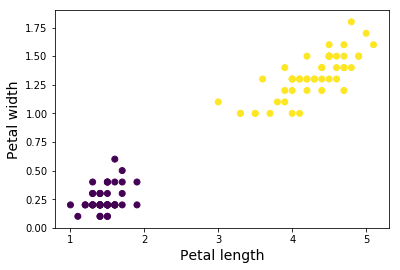

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.show()

##### SVM Classifier model
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [4]:
from sklearn.svm import SVC
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [8]:
np.max(X)

5.1

In [5]:
svm_clf.coef_

array([[1.29411744, 0.82352928]])

In [6]:
svm_clf.intercept_

array([-3.78823471])

In [7]:
svm_clf.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

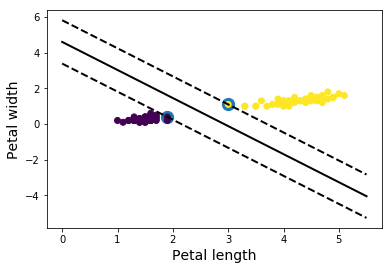

In [8]:
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]
xmin=0
xmax=5.5
# At the decision boundary, w0*x0 + w1*x1 + b = 0
 # => x1 = -w0/w1 * x0 - b/w1
x0 = np.linspace(xmin, xmax, 200)
decision_boundary = -w[0]/w[1] * x0 - b/w[1]

margin = 1/w[1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin

svs = svm_clf.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=150)
plt.plot(x0, decision_boundary, "k-", linewidth=2)
plt.plot(x0, gutter_up, "k--", linewidth=2)
plt.plot(x0, gutter_down, "k--", linewidth=2)
###
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)

plt.show()

### Polynomial Decision Boundary

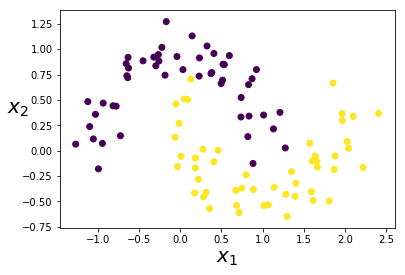

In [9]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
#axes=[-1.5, 2.5, -1, 1.5]
plt.scatter(X[:,0],X[:,1],c=y)
#plt.axis(axes)
#plt.grid(True, which='both')
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.show()

In [14]:
X

array([[ 1.61383833, -0.49115086],
       [ 0.08984723,  0.50439056],
       [ 0.74721047, -0.36911116],
       [-1.10174514,  0.23685641],
       [-0.72871455,  0.14652347],
       [-0.65891281,  0.857088  ],
       [ 0.22828266,  0.73453868],
       [ 1.39439184, -0.45063627],
       [ 0.87158283,  0.70852888],
       [ 0.88304472, -0.12658445],
       [ 0.38220326,  0.76957897],
       [-0.32279169,  0.92145523],
       [ 1.29900621, -0.64914275],
       [-0.63569974,  0.91873422],
       [ 1.96899387,  0.297549  ],
       [ 1.21073294,  0.37721455],
       [ 1.13998191, -0.36088456],
       [ 1.06805159, -0.53460667],
       [ 0.49598571,  0.66135542],
       [-0.26038715,  0.88295876],
       [-0.06516219,  0.13092506],
       [ 1.87005845, -0.18659309],
       [ 0.03146515,  0.79868048],
       [-1.03151461,  0.35788726],
       [ 0.45814234,  0.00308109],
       [ 0.40767679,  0.9574049 ],
       [-0.9379972 ,  0.46846678],
       [ 2.02675758,  0.09006383],
       [ 0.73867736,

In [15]:
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

##### Pipeline
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

##### StandardScalar
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

##### Polynomial Features
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

##### Linear SVC
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
polynomial_svm_clf = Pipeline([("poly_features", PolynomialFeatures(degree=3)),
("scaler", StandardScaler()),("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))])
polynomial_svm_clf.fit(X, y)
clf=polynomial_svm_clf 

D:\Instal_Anaonda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:
## Checking for plotting Decision boundary ## Fine working
axes=[-1.5, 2.5, -1, 1.5]
x0s = np.linspace(axes[0], axes[1], 100)
x1s = np.linspace(axes[2], axes[3], 100)
x0, x1 = np.meshgrid(x0s, x1s)
XX = np.c_[x0.ravel(), x1.ravel()]

In [16]:
y_pred = clf.predict(XX).reshape(x0.shape)
y_pred

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int64)

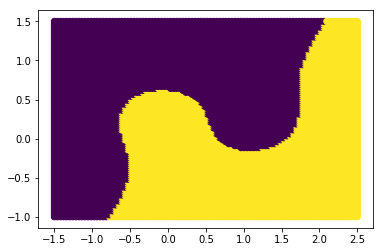

In [17]:
plt.scatter(x0, x1, c=y_pred)#, cmap=plt.cm.brg, alpha=0.2)

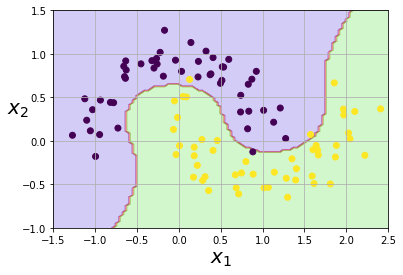

In [18]:
## Now plotting all dataset with decision boundary
axes=[-1.5, 2.5, -1, 1.5]
x0s = np.linspace(axes[0], axes[1], 100)
x1s = np.linspace(axes[2], axes[3], 100)
x0, x1 = np.meshgrid(x0s, x1s)
XX = np.c_[x0.ravel(), x1.ravel()]
y_pred = clf.predict(XX).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2) ##  OR > plt.scatter(x0, x1, c=y_pred)
###
plt.scatter(X[:,0],X[:,1],c=y)
plt.axis(axes)
plt.grid(True, which='both')
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.show()

### Kernalized SVM

In [19]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),
                                ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))])
poly_kernel_svm_clf.fit(X, y)
## Check with d=10, r=100,c=5: What differece did you notice?

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

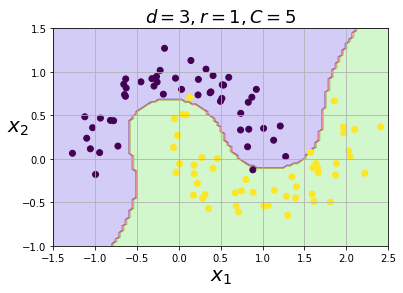

In [21]:
clf=poly_kernel_svm_clf 
axes=[-1.5, 2.5, -1, 1.5]
x0s = np.linspace(axes[0], axes[1], 100)
x1s = np.linspace(axes[2], axes[3], 100)
x0, x1 = np.meshgrid(x0s, x1s)
XX = np.c_[x0.ravel(), x1.ravel()]
y_pred = clf.predict(XX).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.title(r"$d=3, r=1, C=5$", fontsize=18)
#plt.show()
###
plt.scatter(X[:,0],X[:,1],c=y)
plt.axis(axes)
plt.grid(True, which='both')
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.show()

##### Linear Regression and Polynomial regression (used Kernel trick) are also done by SVM.
##### How? Learn  @ Yourself !!!!